### Requriment
-MNIST

-DATAloader, Transformation

-Multilayer Neural Net, Activation Function

-Loss and Optimoizer 

-Training loop (batch training)

-Model evaluation 

-GPU support 

In [48]:
import torch 
import torch.nn as nn 
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 

#device cofig 
device =torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyper parameter 
input_size =784 # 28X28 
hidden_size =100 
num_classes = 10 
num_epochs = 10 
batch_size = 100
learning_rate = 0.001 

#MNIST 
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
    transform=transforms.ToTensor(),download =True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
    transform=transforms.ToTensor(),download =True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                            batch_size = batch_size,
                                            shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                            batch_size = batch_size,
                                            shuffle=True)    

                       

torch.Size([100, 1, 28, 28]) torch.Size([100])


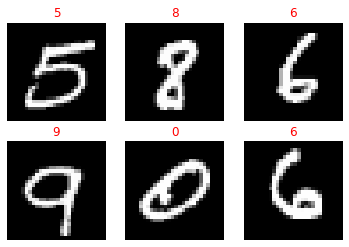

In [49]:
examples = iter(train_loader)
sample,labels = examples.next()
print(sample.shape, labels.shape)
                                    
for i in range(6): 
    plt.subplot(2,3,i+1)
    plt.imshow(sample[i][0],cmap='gray')
    plt.title(labels[i].item(),c='r')
    plt.axis('off')
plt.show()

In [50]:
device

device(type='cuda')

In [51]:
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,num_classes)
    def forward(self,x):
        out =self.l1(x)
        out =self.relu(out)
        out =self.l2(out)
        return out 

model = NeuralNet(input_size,hidden_size,num_classes).to(device)

# loss and optimizer 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

# training loop 
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader) :
        # 100,1,28,28
        # 100, 784
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)

        # forward 
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0 :
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
    



epoch 1/10, step 100/600, loss = 0.5727
epoch 1/10, step 200/600, loss = 0.3143
epoch 1/10, step 300/600, loss = 0.2456
epoch 1/10, step 400/600, loss = 0.2419
epoch 1/10, step 500/600, loss = 0.4149
epoch 1/10, step 600/600, loss = 0.2327
epoch 2/10, step 100/600, loss = 0.1276
epoch 2/10, step 200/600, loss = 0.1111
epoch 2/10, step 300/600, loss = 0.2065
epoch 2/10, step 400/600, loss = 0.0882
epoch 2/10, step 500/600, loss = 0.1349
epoch 2/10, step 600/600, loss = 0.0904
epoch 3/10, step 100/600, loss = 0.1470
epoch 3/10, step 200/600, loss = 0.1758
epoch 3/10, step 300/600, loss = 0.1272
epoch 3/10, step 400/600, loss = 0.1002
epoch 3/10, step 500/600, loss = 0.2321
epoch 3/10, step 600/600, loss = 0.1714
epoch 4/10, step 100/600, loss = 0.0700
epoch 4/10, step 200/600, loss = 0.1052
epoch 4/10, step 300/600, loss = 0.0942
epoch 4/10, step 400/600, loss = 0.0892
epoch 4/10, step 500/600, loss = 0.2087
epoch 4/10, step 600/600, loss = 0.1043
epoch 5/10, step 100/600, loss = 0.0414


In [52]:
# test 
with torch.no_grad() :
    n_correct = 0 
    n_samples = 0 
    for images, labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        #value, index
        _,prediction = torch.max(outputs,1)
        n_samples += labels.shape[0]
        n_correct += (prediction == labels).sum().item() 
    
    acc = 100.0 * n_correct /n_samples
    print(f'accuracy = {acc}')


accuracy = 97.79
